Import the Necessary Libraries

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns

Load The preprocessed Dataset

In [2]:
data = pd.read_csv("data.csv")

Split data into train/test sets (80% Train, 20% Test, Stratified Sampling)

In [3]:
train, test = train_test_split(
    data,
    test_size=0.2,
    random_state=0,
    stratify=data['Survived']  # Maintain class balance
)

Define features (X) and target (Y)

In [4]:
train_X = train.iloc[:, 1:].values  # All columns except 'Survived'
train_Y = train.iloc[:, 0].values   # 'Survived' column
test_X = test.iloc[:, 1:].values
test_Y = test.iloc[:, 0].values

In [5]:
print(" Data Loaded and Split Successfully!")
print(f"Training Data: {train_X.shape}, Testing Data: {test_X.shape}")

 Data Loaded and Split Successfully!
Training Data: (712, 8), Testing Data: (179, 8)


## Logistic Regression

In [6]:
# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=0)

# Cross-validation
cv_scores = cross_val_score(log_reg, train_X, train_Y, cv=5, scoring='accuracy')  # 5-fold cross-validation

In [7]:
# Fit the model on the entire training set after cross-validation
log_reg.fit(train_X, train_Y)

# Predict on test data
log_reg_preds = log_reg.predict(test_X)

In [8]:
# Store the metrics
log_reg_results = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(test_Y, log_reg_preds),
    "Precision": precision_score(test_Y, log_reg_preds),
    "Recall": recall_score(test_Y, log_reg_preds),
    "F1-Score": f1_score(test_Y, log_reg_preds)
}

In [9]:
print(" Logistic Regression Model Trained!")
print("Classification Report:")
print(classification_report(test_Y, log_reg_preds, target_names=['Died', 'Survived']))

 Logistic Regression Model Trained!
Classification Report:
              precision    recall  f1-score   support

        Died       0.83      0.89      0.86       110
    Survived       0.80      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



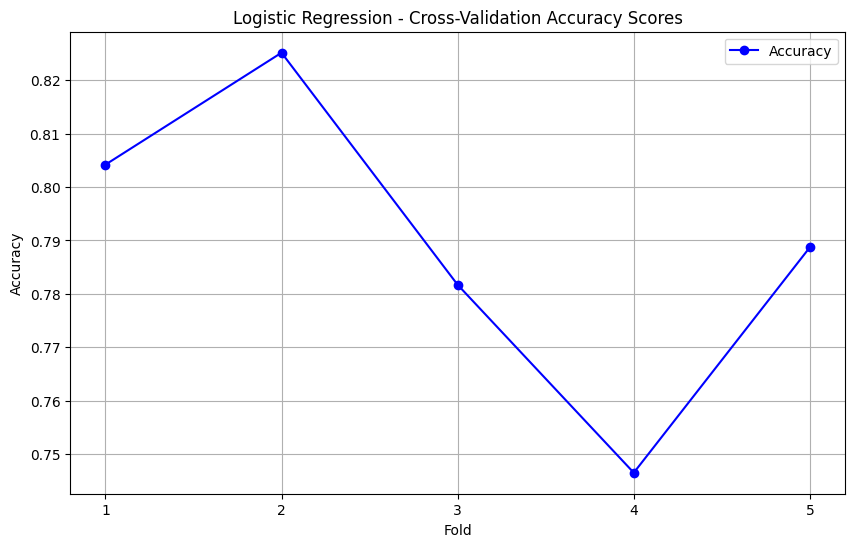

In [10]:
# Plotting the cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', color='b', label='Accuracy')
plt.title('Logistic Regression - Cross-Validation Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, len(cv_scores) + 1))
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# df = pd.read_csv("E:/job update/practice/titanic/titanic_prediction_using_various_models/data.csv")

# X = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'IsAlone', 'Age*Class']].values
# y = df['Survived'].values

# # Normalize features (important for gradient descent)
# X = (X - X.mean(axis=0)) / X.std(axis=0)

# # Add bias term (intercept) to X
# X = np.c_[np.ones(X.shape[0]), X]  # Add column of ones for bias

# # Split into training (80%) and test (20%) sets
# split_idx = int(0.8 * len(X))
# X_train, X_test = X[:split_idx], X[split_idx:]
# y_train, y_test = y[:split_idx], y[split_idx:]

# def sigmoid(z):
#     return 1 / (1 + np.exp(-z))


# def compute_loss(y, y_pred):
#     """Compute Binary Cross-Entropy Loss"""
#     m = len(y)
#     return - (1 / m) * np.sum(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))  # Avoid log(0)



# def gradient_descent(X, y, lr=0.01, epochs=1000, lambda_reg=0.1):
#     """Gradient Descent with L2 Regularization"""
#     m, n = X.shape
#     theta = np.zeros(n)
#     losses = []

#     for i in range(epochs):
#         # Compute predictions
#         z = np.dot(X, theta)
#         y_pred = sigmoid(z)

#         # Compute gradient with L2 Regularization
#         gradient = (1 / m) * np.dot(X.T, (y_pred - y)) + (lambda_reg / m) * theta
#         gradient[0] -= (lambda_reg / m) * theta[0]  # Don't penalize bias term

#         # Update weights
#         theta -= lr * gradient

#         # Compute loss with L2 Regularization
#         loss = compute_loss(y, y_pred) + (lambda_reg / (2 * m)) * np.sum(theta**2)
#         losses.append(loss)

#         # Print loss every 100 iterations
#         if i % 100 == 0:
#             print(f"Iteration {i}, Loss: {loss:.4f}")

#     return theta, losses

# def predict(X, theta, threshold=0.5):
#     """Predict using trained weights"""
#     probabilities = sigmoid(np.dot(X, theta))
#     return (probabilities >= threshold).astype(int)


# def accuracy(y_true, y_pred):
#     return np.mean(y_true == y_pred)

# def precision(y_true, y_pred):
#     TP = np.sum((y_true == 1) & (y_pred == 1))
#     FP = np.sum((y_true == 0) & (y_pred == 1))
#     return TP / (TP + FP) if (TP + FP) > 0 else 0

# def recall(y_true, y_pred):
#     TP = np.sum((y_true == 1) & (y_pred == 1))
#     FN = np.sum((y_true == 1) & (y_pred == 0))
#     return TP / (TP + FN) if (TP + FN) > 0 else 0

# def f1_score(y_true, y_pred):
#     p = precision(y_true, y_pred)
#     r = recall(y_true, y_pred)
#     return 2 * (p * r) / (p + r) if (p + r) > 0 else 0

# def confusion_matrix(y_true, y_pred):
#     TP = np.sum((y_true == 1) & (y_pred == 1))
#     TN = np.sum((y_true == 0) & (y_pred == 0))
#     FP = np.sum((y_true == 0) & (y_pred == 1))
#     FN = np.sum((y_true == 1) & (y_pred == 0))
#     return np.array([[TN, FP], [FN, TP]])


# # Train Logistic Regression with L2 Regularization
# theta, losses = gradient_descent(X_train, y_train, lr=0.001, epochs=500, lambda_reg=1.0)

# # Make predictions
# y_pred_train = predict(X_train, theta)
# y_pred_test = predict(X_test, theta)

# # Compute Metrics
# train_acc = accuracy(y_train, y_pred_train)
# test_acc = accuracy(y_test, y_pred_test)
# prec = precision(y_test, y_pred_test)
# rec = recall(y_test, y_pred_test)
# f1 = f1_score(y_test, y_pred_test)
# conf_matrix = confusion_matrix(y_test, y_pred_test)

# # Print Performance
# print(f"Training Accuracy: {train_acc:.4f}")
# print(f"Test Accuracy: {test_acc:.4f}")
# print(f"Precision: {prec:.4f}")
# print(f"Recall: {rec:.4f}")
# print(f"F1-Score: {f1:.4f}")
# print("\nConfusion Matrix:")
# print(conf_matrix)


## Random Forest

In [12]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Cross-validation 
cv_scores = cross_val_score(rf_model, train_X, train_Y, cv=5, scoring='accuracy')

In [13]:
# Fit the model on the entire training set after cross-validation
rf_model.fit(train_X, train_Y)

# Predict on test data
rf_preds = rf_model.predict(test_X)

In [14]:
# Store the metrics
rf_results = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(test_Y, rf_preds),
    "Precision": precision_score(test_Y, rf_preds),
    "Recall": recall_score(test_Y, rf_preds),
    "F1-Score": f1_score(test_Y, rf_preds)
}

In [15]:
print(" Random Forest Model Trained!")
print("Classification Report:")
print(classification_report(test_Y, rf_preds, target_names=['Died', 'Survived']))

 Random Forest Model Trained!
Classification Report:
              precision    recall  f1-score   support

        Died       0.80      0.89      0.84       110
    Survived       0.79      0.64      0.70        69

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179



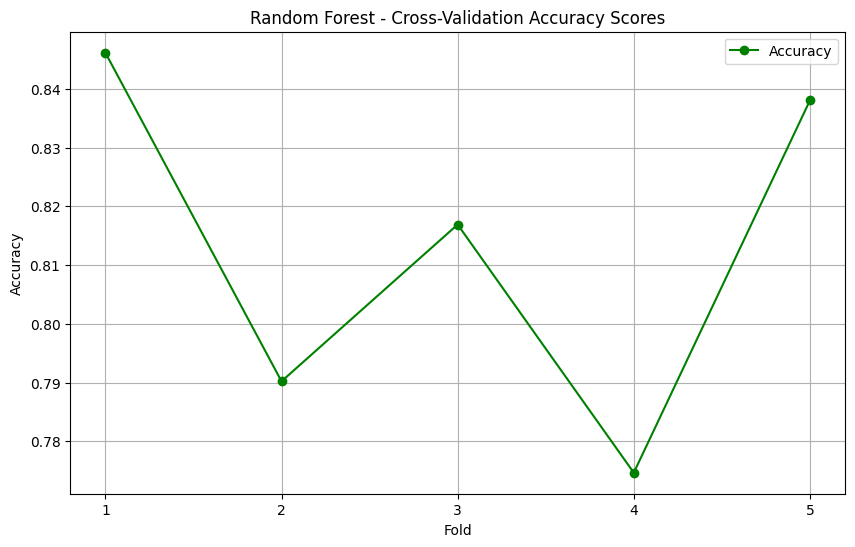

In [16]:
# Plotting the cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', color='g', label='Accuracy')
plt.title('Random Forest - Cross-Validation Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, len(cv_scores) + 1))
plt.legend()
plt.grid(True)
plt.show()

## Neural Network (Pytorch)

In [17]:
# Prepare the data tensors
train_X_tensor = torch.tensor(train_X, dtype=torch.float32)
train_Y_tensor = torch.tensor(train_Y, dtype=torch.float32).view(-1, 1)
test_X_tensor = torch.tensor(test_X, dtype=torch.float32)
test_Y_tensor = torch.tensor(test_Y, dtype=torch.float32).view(-1, 1)


In [18]:
# Define the Neural Network architecture
class TitanicNN(nn.Module):
    def __init__(self, input_size):
        super(TitanicNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


In [19]:
# Initialize the model, criterion, and optimizer
model = TitanicNN(train_X.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [20]:
# Training the model
epochs = 500
losses = []  # List to store loss values for plotting

In [21]:
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(train_X_tensor)
    loss = criterion(output, train_Y_tensor)
    loss.backward()
    optimizer.step()
    
    # Store loss value at each epoch
    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.7852
Epoch 100, Loss: 0.4065
Epoch 200, Loss: 0.3843
Epoch 300, Loss: 0.3766
Epoch 400, Loss: 0.3719


In [22]:
# Predict on test data
with torch.no_grad():
    nn_preds = model(test_X_tensor)
    nn_preds = (nn_preds >= 0.5).int().numpy().flatten()

In [23]:
# Store the evaluation metrics
nn_results = {
    "Model": "Neural Network",
    "Accuracy": accuracy_score(test_Y, nn_preds),
    "Precision": precision_score(test_Y, nn_preds),
    "Recall": recall_score(test_Y, nn_preds),
    "F1-Score": f1_score(test_Y, nn_preds)
}

In [24]:
print(" Neural Network Model Trained!")
print("Classification Report:")
print(classification_report(test_Y, nn_preds, target_names=['Died', 'Survived']))

 Neural Network Model Trained!
Classification Report:
              precision    recall  f1-score   support

        Died       0.79      0.95      0.86       110
    Survived       0.89      0.59      0.71        69

    accuracy                           0.82       179
   macro avg       0.84      0.77      0.79       179
weighted avg       0.83      0.82      0.81       179



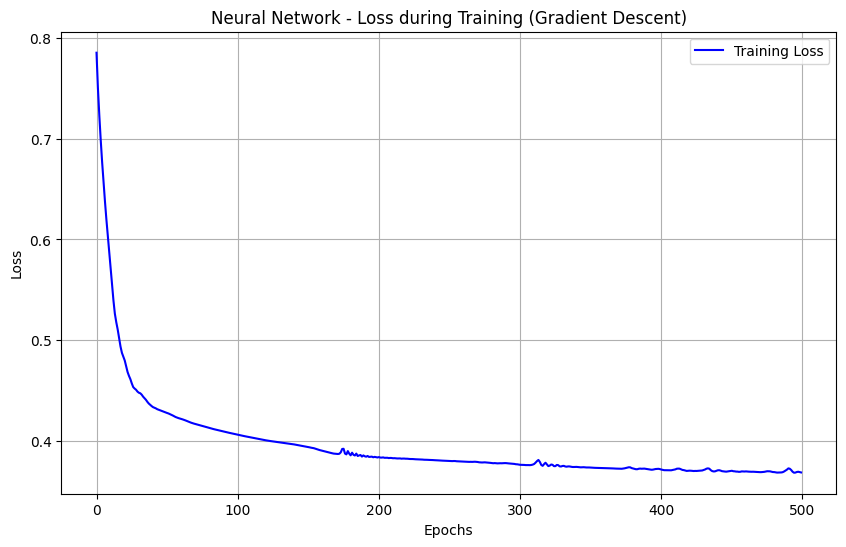

In [25]:
# Plotting the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), losses, label="Training Loss", color='b')
plt.title("Neural Network - Loss during Training (Gradient Descent)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

## Compare Model Performance

Model Performance Comparison:
                     Accuracy  Precision  Recall  F1-Score
Logistic Regression    0.8212     0.8033  0.7101    0.7538
Random Forest          0.7933     0.7857  0.6377    0.7040
Neural Network         0.8156     0.8913  0.5942    0.7130


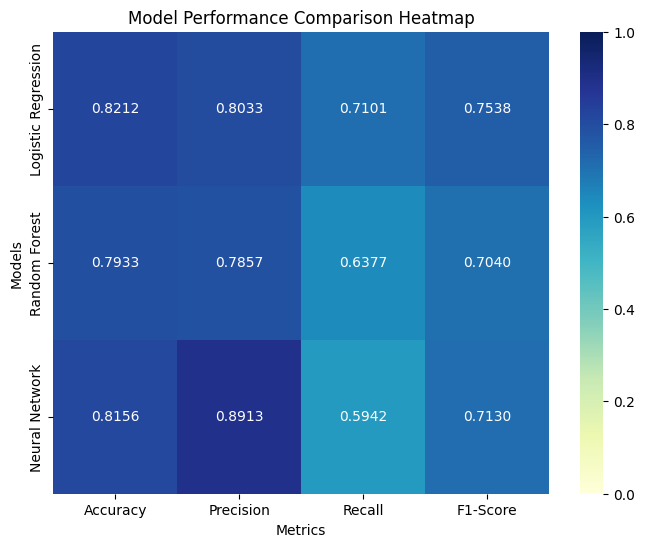

In [44]:
# Create a DataFrame for performance comparison
results_df = pd.DataFrame({
    'Accuracy': [log_reg_results['Accuracy'], rf_results['Accuracy'], nn_results['Accuracy']],
    'Precision': [log_reg_results['Precision'], rf_results['Precision'], nn_results['Precision']],
    'Recall': [log_reg_results['Recall'], rf_results['Recall'], nn_results['Recall']],
    'F1-Score': [log_reg_results['F1-Score'], rf_results['F1-Score'], nn_results['F1-Score']]
}, index=['Logistic Regression', 'Random Forest', 'Neural Network']).round(4)

# Print the performance comparison
print("Model Performance Comparison:")
print(results_df.to_string(index=True))

# Plot the heatmap with a brighter color palette
plt.figure(figsize=(8, 6))
sns.heatmap(results_df, annot=True, cmap='YlGnBu', fmt='.4f', cbar=True, vmin=0, vmax=1)

# Add title and labels
plt.title('Model Performance Comparison Heatmap')
plt.ylabel('Models')
plt.xlabel('Metrics')

plt.show()

Explanation and Analysis:

1. Accuracy:

        Logistic Regression (82.12%) has the highest accuracy, suggesting it is the most reliable overall for this task.
        Neural Network (81.56%) is slightly behind but performs nearly as well as logistic regression.
        Random Forest (79.33%) has a lower accuracy, which might indicate it is struggling with overfitting or underfitting the data.

2. Precision:

        Neural Network (89.13%) outperforms the other models in precision, meaning that it is the best at correctly predicting survivors when it classifies them as such.
        Logistic Regression (80.33%) follows, showing it has a good balance between true positive predictions and false positives.
        Random Forest (78.57%) has a slightly lower precision than logistic regression, suggesting that it misclassifies a higher number of non-survivors as survivors compared to logistic regression.

3. Recall:

        Logistic Regression (71.01%) has the highest recall, which means it is the best at identifying the actual survivors.
        Random Forest (63.77%) performs worse in recall, which might indicate that it's not detecting as many survivors, resulting in false negatives.
        Neural Network (59.42%) has the lowest recall, meaning it's missing a significant portion of the survivors.

4. F1-Score:

        Logistic Regression (75.38%) has the best F1-Score, which is the harmonic mean of precision and recall, indicating it has the best balance between precision and recall.
        Neural Network (71.30%) has a slightly lower F1-Score, which is due to its lower recall.
        Random Forest (70.40%) has the lowest F1-Score, indicating it struggles to balance precision and recall effectively.

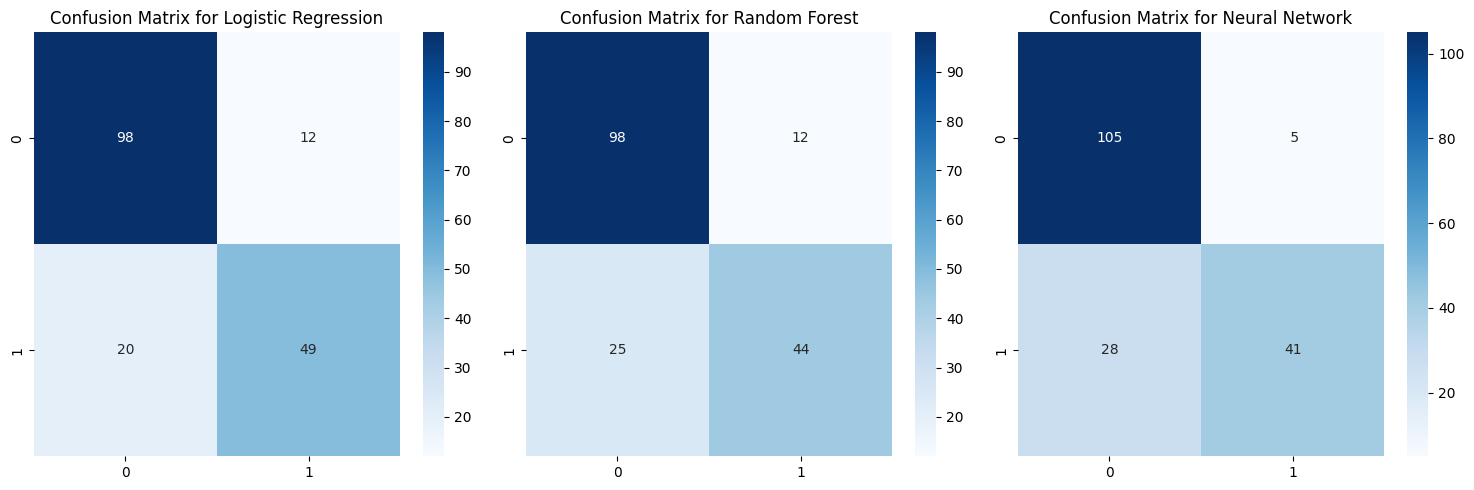

In [36]:
# Create confusion matrices
log_reg_cm = confusion_matrix(test_Y, log_reg_preds)
rf_cm = confusion_matrix(test_Y, rf_preds)
nn_cm = confusion_matrix(test_Y, nn_preds)

# Plot confusion matrices
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Logistic Regression Confusion Matrix
sns.heatmap(log_reg_cm, ax=ax[0], annot=True, fmt='2.0f', cmap='Blues')
ax[0].set_title('Confusion Matrix for Logistic Regression')

# Random Forest Confusion Matrix
sns.heatmap(rf_cm, ax=ax[1], annot=True, fmt='2.0f', cmap='Blues')
ax[1].set_title('Confusion Matrix for Random Forest')

# Neural Network Confusion Matrix
sns.heatmap(nn_cm, ax=ax[2], annot=True, fmt='2.0f', cmap='Blues')
ax[2].set_title('Confusion Matrix for Neural Network')

plt.tight_layout()
plt.show()

Assessment:

1. Logistic Regression: Strong overall performance with a reasonable balance between precision and recall.
2. Random Forest: Performs similarly but has a lower recall.
3. Neural Network: Has excellent precision, but very low recall, making it less reliable when identifying actual survivors .

Conclusion:

1. Logistic Regression is the most balanced and overall the best-performing model for this classification task.
2. If the objective is to maximize precision (minimizing false positives), Neural Networks would be a good choice.
3. If minimizing false negatives (recall) is the priority, Logistic Regression outperforms the other models.
4. Random Forests might require further tuning or different feature engineering to improve their performance for this problem.